<a href="https://colab.research.google.com/github/Naumov1889/data-science-from-scratch_jupyter-notebook/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Documentation](https://matplotlib.org/3.0.2/index.html#documentation) <br>
# Introductory 
A change



## Usage Guide

In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Parts of a Figure
![Parts of a Figure](https://matplotlib.org/3.0.2/_images/anatomy.png)

#### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes, but to be useful should have at least one.

#### Axes
This is what you think of as '**a plot', it is the region of the image with the data space**. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) **Axis** objects  which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()). <br>
Be aware of the difference between Axes and Axis.

#### Axis
These are the **number-line-like** objects. They take care of setting the **graph limits** and generating the **ticks** (the marks on the axis) and **ticklabels** (strings labeling the ticks).

#### Artist
Basically **everything you can see on the figure** is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. 

### Types of inputs to plotting functions
All of plotting functions **expect np.array as input**. Classes that are 'array-like' such as **pandas data objects** and **np.matrix** may or may not work as intended. It is best to **convert these to np.array objects** prior to plotting.

In [0]:
# to convert a pandas.DataFrame
import pandas
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))  # pandas.core.frame.DataFrame
a_asndarray = a.values  # numpy.ndarray

In [0]:
# to covert a np.matrix
b = np.matrix([[1,2],[3,4]])  # numpy.matrixlib.defmatrix.matrix
b_asarray = np.asarray(b)  # numpy.ndarray

### Matplotlib, pyplot: how are they related?
**Matplotlib** is the whole package; **matplotlib.pyplot** is a module in matplotlib.

**Pyplot** provides the state-machine interface to the underlying object-oriented plotting library. The state-machine implicitly and automatically **creates figures and axes** to achieve the desired plot. For example:

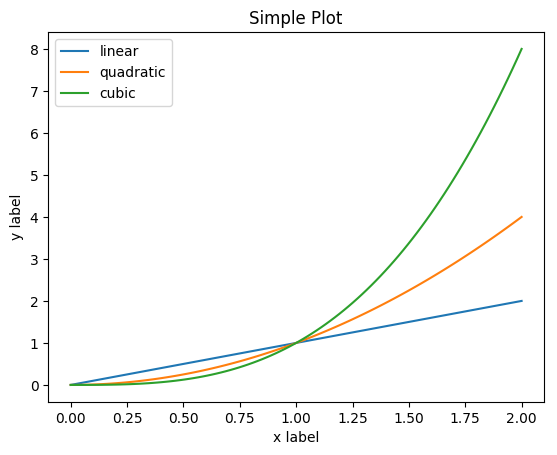

In [0]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

### Coding Styles
the imports at the top of your scripts will typically be:


```
import matplotlib.pyplot as plt
import numpy as np
```
Then one calls, for example, np.arange, np.zeros, np.pi, plt.figure, plt.plot, plt.show, etc. Use the pyplot interface for creating figures, and then use the object methods for the rest:


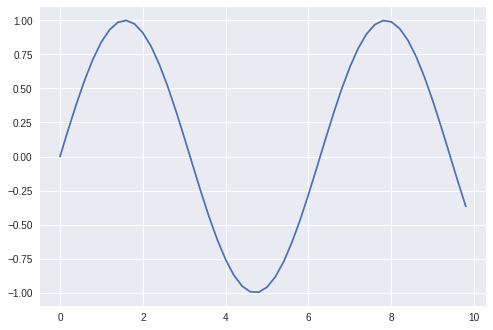

In [0]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

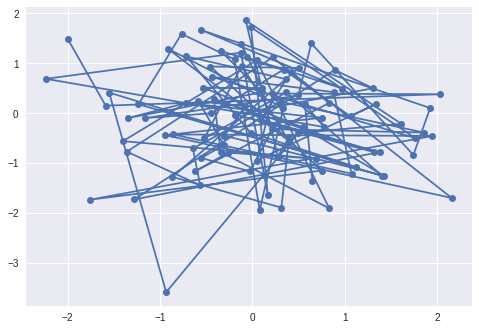

In [0]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'o'})

or if you wanted to have 2 sub-plots:

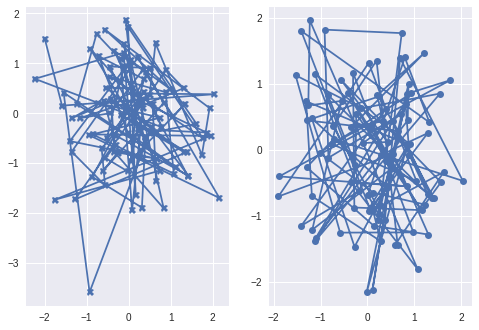

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'X'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

### Different use cases and output formats
matplotlib targets many different use cases and output formats. Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs.

### [Performance](https://matplotlib.org/3.0.2/tutorials/introductory/usage.html#performance)
#### Using the fast style
The fast style can be used to automatically set simplification and chunking parameters to reasonable settings to speed up plotting large amounts of data. It can be used simply by running:


```
import matplotlib.style as mplstyle
mplstyle.use('fast')
```

It is very light weight, so it plays nicely with other styles, just make sure the fast style is applied last so that other styles do not overwrite the settings:


```
mplstyle.use(['dark_background', 'ggplot', 'fast'])
```




## Pyplot tutorial


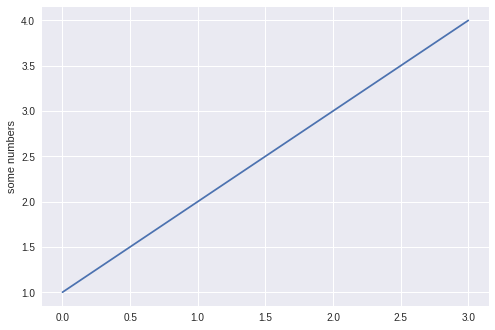

In [0]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4.** If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values**, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

### Formatting the style of your plot
[complete list of line styles and format strings](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) <br>
For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles:

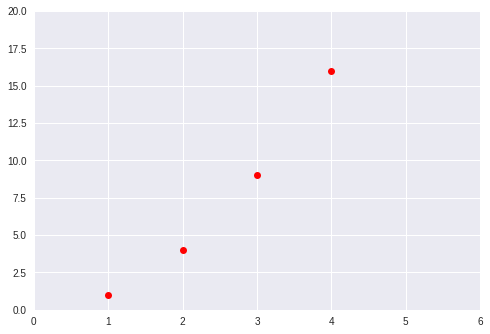

In [0]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

The **axis()** command in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

Generally, you will use numpy arrays. In fact, **all sequences are converted to numpy arrays internally**. The example below illustrates a plotting several lines with different format styles in one command using arrays.


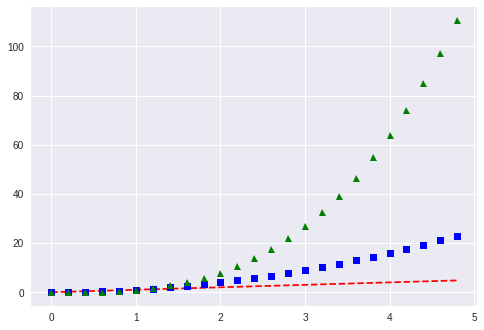

In [0]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### [Plotting with keyword strings](https://matplotlib.org/3.0.2/tutorials/introductory/pyplot.html#plotting-with-keyword-strings)
Haven't understood this chapter. <br>
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.



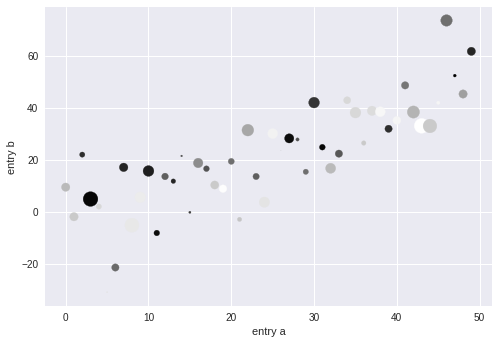

In [0]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables

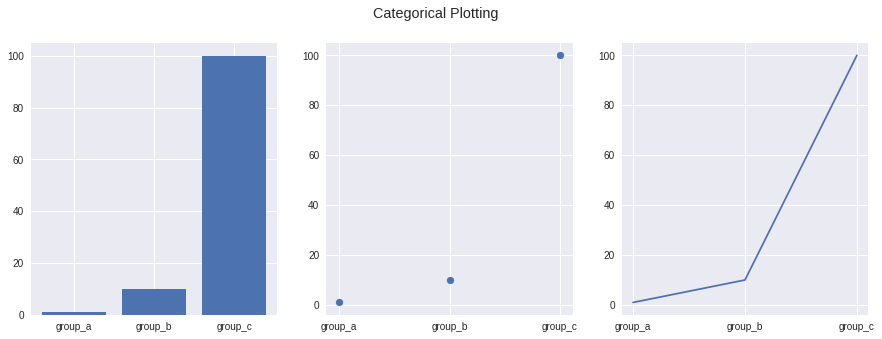

In [0]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(15, 5))

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties
Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see [matplotlib.lines.Line2D](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). There are several ways to set line properties: 
*  Use keyword args:

```
    plt.plot(x, y, linewidth=2.0)
```

*  Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:



```
    # **set_ + property**
    line, = plt.plot(x, y, '-')
    line.set_antialiased(False) # turn off antialising
    line.set_linewidth(10.0)
  
```


*  Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:


```
    lines = plt.plot(x1, y1, x2, y2)
    # use keyword args
    plt.setp(lines, color='r', linewidth=2.0)
    # or MATLAB style string value pairs
    plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

### Working with multiple figures and axes
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and **gcf() returns the current figure** (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

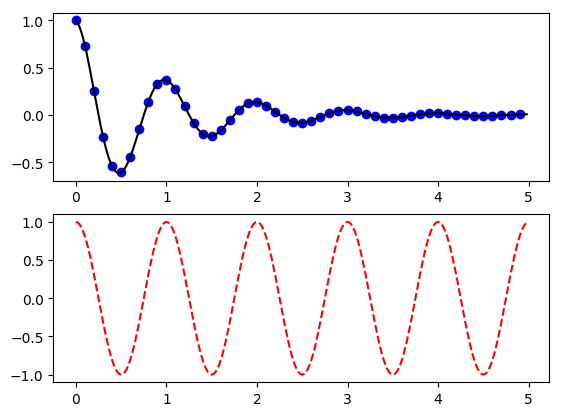

In [0]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don't manually specify any axes. The **subplot()** command specifies **numrows, numcols, plot_number** where plot_number ranges from 1 to numrows*numcols. The **commas** in the subplot command **are optional** if numrows*numcols<10. So **subplot(211) is identical to subplot(2, 1, 1)**.

You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as **axes([left, bottom, width, height])** where all values are in fractional (**0 to 1**) coordinates. See [Axes Demo](https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/axes_demo.html) for an example of placing axes manually.

Text(0.5,1,'third')

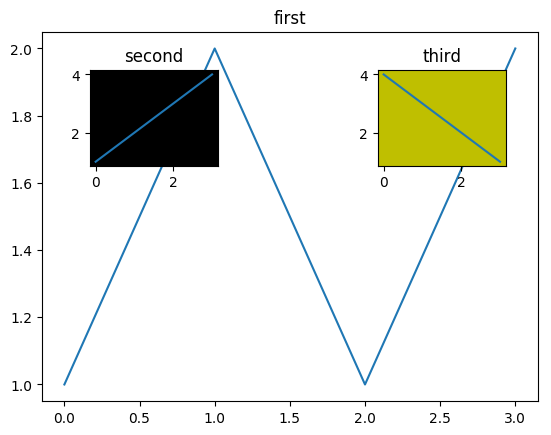

In [0]:
plt.plot([1,2,1,2])
plt.title('first')

plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot([1,2,3,4])
plt.title('second')

plt.axes([0.65, .6, .2, .2], facecolor='y')
plt.plot([4,3,2,1])
plt.title('third')


See [Basic Subplot Demo](https://matplotlib.org/3.0.2/gallery/subplots_axes_and_figures/subplot_demo.html) for an example with lots of subplots.

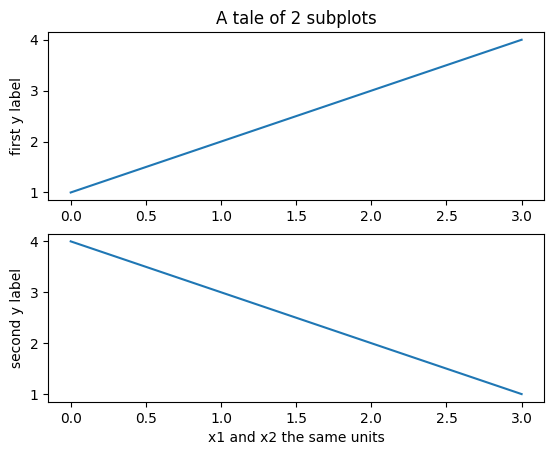

In [0]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot([1,2,3,4])
ax1.set(title='A tale of 2 subplots', ylabel='first y label')

ax2.plot([4,3,2,1])
ax2.set(xlabel='x1 and x2 the same units', ylabel='second y label')

plt.show()

You can create multiple figures by using multiple **figure()** calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

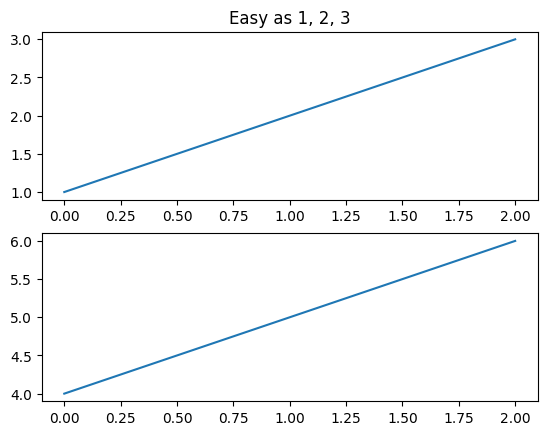

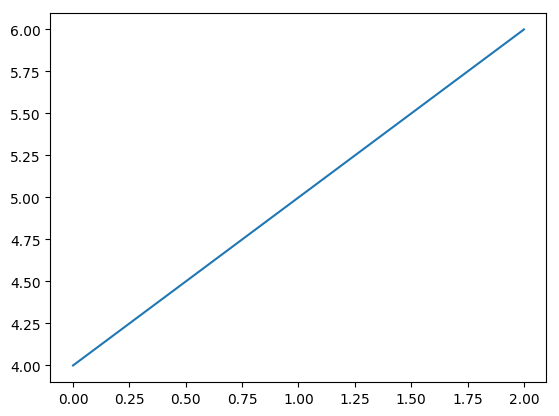

In [0]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

You can **clear the current figure with clf()** and the **current axes with cla()**. If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object oriented API, which you can use instead (see Artist tutorial)

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with **close()**. Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

### [Working with text](https://matplotlib.org/3.0.2/tutorials/text/text_intro.html)
![pyplot API vs OO API](https://i.imgur.com/mzQtr17.png)

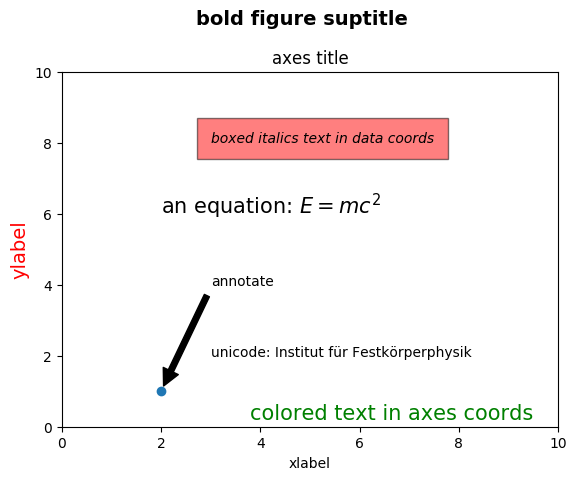

In [0]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel', fontsize=14, color='red')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

[Text properties and layout](https://matplotlib.org/3.0.2/tutorials/text/text_props.html)

#### Using mathematical expressions in text
matplotlib accepts TeX equation expressions in any text expression.

The r preceding the title string is important -- it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts -- for details see [Writing mathematical expressions](https://matplotlib.org/3.0.2/tutorials/text/mathtext.html). Thus you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dvipng installed, you can also use LaTeX to format your text and incorporate the output directly into your display figures or saved postscript -- see [Text rendering With LaTeX](https://matplotlib.org/3.0.2/tutorials/text/usetex.html).

#### Annotating text
The uses of the basic **[text()](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text)** command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the **[annotate()](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate)** method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.


```
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
```

In this basic example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose -- see [Basic annotation](https://matplotlib.org/3.0.2/tutorials/text/annotations.html#annotations-tutorial) and[ Advanced Annotation](https://matplotlib.org/3.0.2/tutorials/text/annotations.html#plotting-guide-annotation) for details. More examples can be found in [Annotating Plots](https://matplotlib.org/3.0.2/gallery/text_labels_and_annotations/annotation_demo.html).


### Logarithmic and other nonlinear axes
matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:


```
plt.xscale('log')
```


An example of four plots with the same data and different scales for the y axis is shown below.

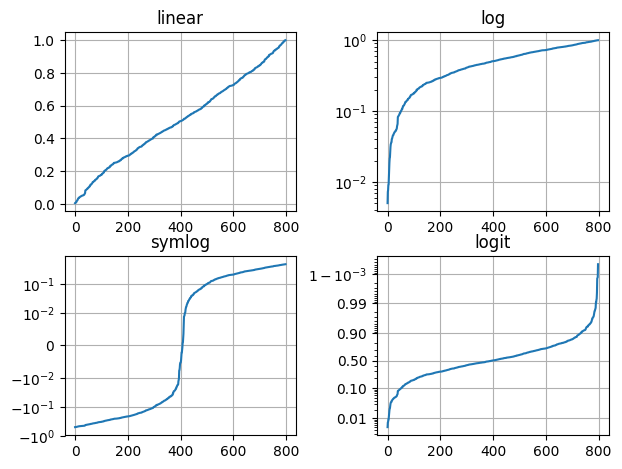

In [0]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()